In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
import sys
import sklearn
import tensorflow as tf

from tensorflow import keras
from sklearn.model_selection import train_test_split
# import keras

In [2]:
print(tf.__version__)

2.0.0


In [3]:
print(sys.version_info)

sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)


In [4]:
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__, module.__version__)

matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X,y),(X_test,y_test) = fashion_mnist.load_data()

### 切分训练集和测试集

In [6]:
# 切分训练集和验证集
X.shape
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.35)

In [7]:
X_train.shape

(39000, 28, 28)

In [8]:
y_train.shape

(39000,)

In [9]:
X_val.shape

(21000, 28, 28)

In [10]:
y_val.shape

(21000,)

In [11]:
X_train.shape

(39000, 28, 28)

In [12]:
np.random.choice(len(X_train))

6379

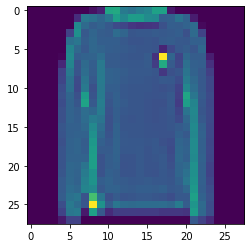

In [13]:
def show_single_image(img):
    plt.clf()
    plt.imshow(img)
    plt.show()

show_single_image(X_train[np.random.choice(len(X_train))])

In [14]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
X_val = standardScaler.fit_transform(X_val.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
X_test = standardScaler.fit_transform(X_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

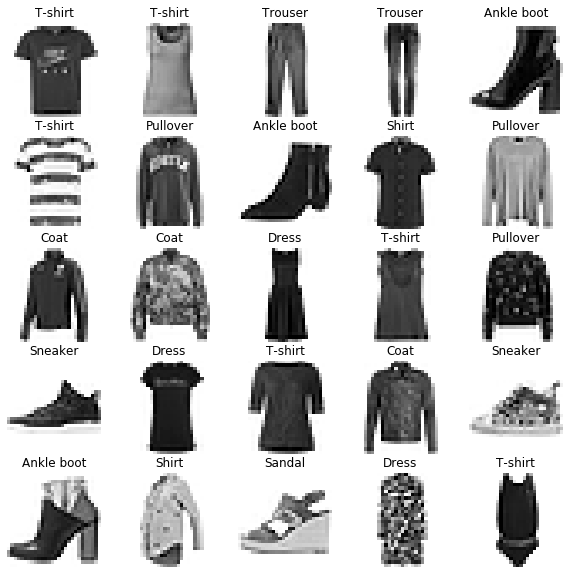

In [15]:
def show_images(r,c,X,y,class_names):
    assert len(X)==len(y)
    assert r*c != len(X)
    plt.figure(figsize=(r*2,c*2))
    for i in range(r):
        for j in range(c):
            idx = r * i + j
            plt.subplot(r,c,idx+1)
            plt.imshow(X[idx],interpolation='nearest',cmap='binary')
            plt.axis('off')
            plt.title(class_names[y[idx]])
    plt.show()
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']

show_images(5,5,X_train,y_train,class_names)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # 将28*28的矩阵展成长度为28*28的一维向量
model.add(keras.layers.Dense(300,activation='relu')) # 全连接层  下一层的所有单元和上一层的所有单元一一链接
model.add(keras.layers.Dense(100,activation='relu')) # 全连接层  100和这300做全连接
model.add(keras.layers.Dense(10,activation='softmax'))

# relu y =max(0,x)
# softmax : 将向量变成概率分布. x = [x1,x2,x3]
# y = e^x1 /sum , e^x2 / sum, e^x3 / sum 
# sum = (e^x1 + e^x2 + e^x3)

In [17]:
# why sparse y->index
# y->one_hot->[]
model.compile(
    loss="sparse_categorical_crossentropy"
    ,optimizer = keras.optimizers.SGD(0.001)
    ,metrics = ["accuracy"]
)

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 全连接层
# 样本数 m
# [m, 784] * W + b -> [m, 300] W.shape = [784, 300], b = [300]

In [21]:
log_dir= './callbacks'
if not os.path.exists(log_dir):
    os.mkdir(log_dir)
output_model_file = os.path.join(log_dir,"fashion_mnist_model.h5")

call_backs = [
    keras.callbacks.TensorBoard(log_dir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)# 连续训练patience次差距比mindelta小时提前关闭掉
]
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val),callbacks=call_backs)

Train on 39000 samples, validate on 21000 samples
Epoch 1/10
39000/39000 [==============================] - 14s 365us/sample - loss: 1.0270 - accuracy: 0.6675 - val_loss: 0.6945 - val_accuracy: 0.7711
Epoch 2/10
39000/39000 [==============================] - 11s 272us/sample - loss: 0.6267 - accuracy: 0.7870 - val_loss: 0.5856 - val_accuracy: 0.8015
Epoch 3/10
39000/39000 [==============================] - 9s 223us/sample - loss: 0.5505 - accuracy: 0.8105 - val_loss: 0.5370 - val_accuracy: 0.8165
Epoch 4/10
39000/39000 [==============================] - 10s 258us/sample - loss: 0.5098 - accuracy: 0.8231 - val_loss: 0.5047 - val_accuracy: 0.8261
Epoch 5/10
39000/39000 [==============================] - 12s 309us/sample - loss: 0.4829 - accuracy: 0.8312 - val_loss: 0.4876 - val_accuracy: 0.8303
Epoch 6/10
39000/39000 [==============================] - 10s 257us/sample - loss: 0.4633 - accuracy: 0.8386 - val_loss: 0.4675 - val_accuracy: 0.8374
Epoch 7/10
39000/39000 [=====================

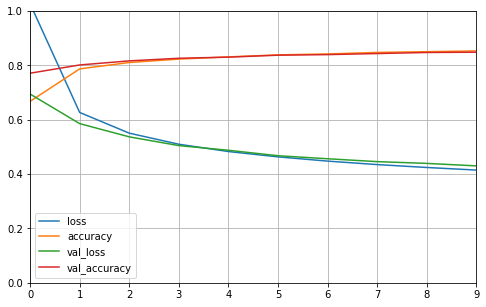

In [22]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)


In [23]:
model.evaluate(X_test, y_test, verbose=0)

[0.4527332431077957, 0.8367]